# HyFI Test Notebook

This Jupyter Notebook is used to test the HyFI package. It contains examples of how to use the package and how to create a new HyFI model.


In [1]:
from hyfi.main import HyFI

/home/yj.lee/.venvs/hyfi/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


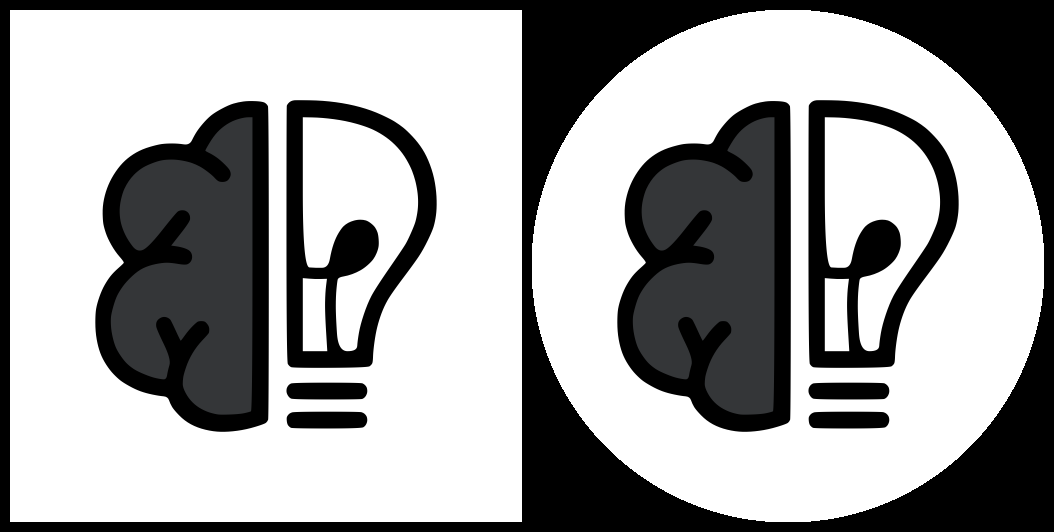

In [2]:
url = "https://assets.entelecheia.ai/logo-square-512.png"
url2 = "https://assets.entelecheia.ai/logo-circle-512.png"

img = HyFI.load_image(url)
img2 = HyFI.load_image(url2)

cimg = HyFI.collage([img, img2], cols=2)
cimg.image

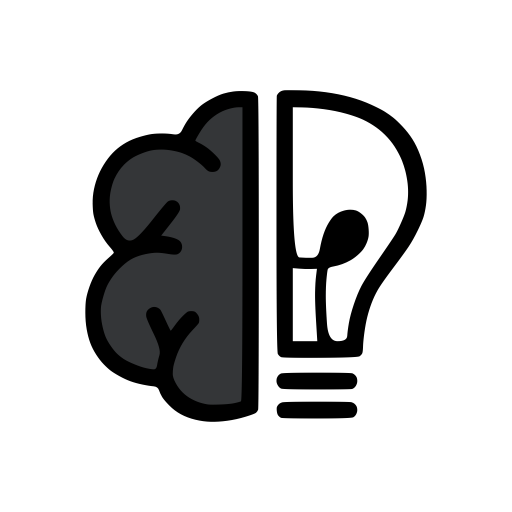

'test.gif'

In [3]:
url = "https://assets.entelecheia.ai/logo-square-512.png"
url2 = "https://assets.entelecheia.ai/logo-circle-512.png"

HyFI.make_gif([url, url2], output_filepath="test.gif", show=True)

In [4]:
HyFI.about()


name        : HyFI
authors     : Young Joon Lee <entelecheia@hotmail.com>
description : Hydra Fast Interface (Hydra and Pydantic based interface framework)
homepage    : https://hyfi.entelecheia.ai
license     : MIT
version     : 0.0.0

Execute `hyfi --help` to see what you can do with HyFI


## Check Version

Now, let's get the version of the `hyfi` package.


In [5]:
version = HyFI.__version__
print("HyFI version:", version)

HyFI version: 0.7.2


In [6]:
HyFI.dotenv().dict()

{'config_name': '__init__',
 'DOTENV_FILENAME': '.env',
 'DOTENV_DIR': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi',
 'DOTENV_PATH': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/.env',
 'HYFI_RESOURCE_DIR': '',
 'HYFI_GLOBAL_ROOT': '',
 'HYFI_GLOBAL_WORKSPACE_NAME': 'workspace',
 'HYFI_PROJECT_NAME': 'test-project',
 'HYFI_TASK_NAME': 'test-task',
 'HYFI_PROJECT_DESC': '',
 'HYFI_PROJECT_ROOT': '',
 'HYFI_PROJECT_WORKSPACE_NAME': 'workspace',
 'HYFI_LOG_LEVEL': 'WARNING',
 'HYFI_VERBOSE': False,
 'HYFI_NUM_WORKERS': 1,
 'CACHED_PATH_CACHE_ROOT': '',
 'CUDA_DEVICE_ORDER': 'PCI_BUS_ID',
 'CUDA_VISIBLE_DEVICES': '',
 'WANDB_PROJECT': '',
 'WANDB_DISABLED': '',
 'WANDB_DIR': '',
 'WANDB_NOTEBOOK_NAME': '',
 'WANDB_SILENT': False,
 'LABEL_STUDIO_SERVER': '',
 'KMP_DUPLICATE_LIB_OK': 'True',
 'TOKENIZERS_PARALLELISM': False,
 'WANDB_API_KEY': None,
 'HUGGING_FACE_HUB_TOKEN': None,
 'OPENAI_API_KEY': SecretStr('**********'),
 'ECOS_API_KEY': None,
 'FRED_API_KEY': None,
 'NASDA

In [7]:
# Test expanding $PWD and $USER variables
posix_expr = "The system workspace root is $WORKSPACE_ROOT and the user is $USER."

expanded_expr = HyFI.expand_posix_vars(posix_expr)
print(expanded_expr)

The system workspace root is /mnt/nvme1n1p2/home/yj.lee/workspace and the user is yj.lee.


## Initialize Workspace

We'll initialize the workspace using the `HyFI.init_workspace` function. The function takes the following parameters:

- `project_name`: Name of the project to use.
- `task_name`: Name of the task to use.
- `project_description`: Description of the project that will be used.
- `project_root`: Root directory of the project.
- `project_workspace_name`: Name of the project's workspace directory.
- `global_hyfi_root`: Root directory of the global hyfi.
- `global_workspace_name`: Name of the global hierachical workspace directory.
- `num_workers`: Number of workers to run.
- `log_level`: Log level for the log.
- `autotime`: Whether to automatically set time and / or keep track of run times.
- `retina`: Whether to use retina or not.
- `verbose`: Enables or disables logging

We'll check if we're running in Google Colab, and if so, we'll mount Google Drive.


In [8]:
if HyFI.is_colab():
    HyFI.mount_google_drive()

ws = HyFI.init_workspace(
    project_name="hyfi",
    task_name="test",
    log_level="DEBUG",
    verbose=True,
)

print("project_dir:", ws.project_dir)
print("project_workspace_dir:", ws.project_workspace_dir)

INFO:hyfi.utils.notebook:Extension autotime not found. Install it first.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:hydra.core.utils:Setting JobRuntime:name=UNKNOWN_NAME
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hyfi.__global__.config:Using default config.
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app


project_dir: /home/yj.lee/.hyfi/workspace/projects/hyfi
project_workspace_dir: /home/yj.lee/.hyfi/workspace/projects/hyfi/workspace


In [9]:
ws.dotenv.dict()

{'config_name': '__init__',
 'DOTENV_FILENAME': '.env',
 'DOTENV_DIR': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi',
 'DOTENV_PATH': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/.env',
 'HYFI_RESOURCE_DIR': '',
 'HYFI_GLOBAL_ROOT': '/home/yj.lee/.hyfi',
 'HYFI_GLOBAL_WORKSPACE_NAME': 'workspace',
 'HYFI_PROJECT_NAME': 'hyfi',
 'HYFI_TASK_NAME': 'test',
 'HYFI_PROJECT_DESC': '',
 'HYFI_PROJECT_ROOT': '/home/yj.lee/.hyfi/workspace/projects/hyfi',
 'HYFI_PROJECT_WORKSPACE_NAME': 'workspace',
 'HYFI_LOG_LEVEL': 'DEBUG',
 'HYFI_VERBOSE': False,
 'HYFI_NUM_WORKERS': -1,
 'CACHED_PATH_CACHE_ROOT': '/home/yj.lee/.hyfi/workspace/.cache/cached_path',
 'CUDA_DEVICE_ORDER': 'PCI_BUS_ID',
 'CUDA_VISIBLE_DEVICES': '',
 'WANDB_PROJECT': 'hyfi',
 'WANDB_DISABLED': '',
 'WANDB_DIR': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/logs',
 'WANDB_NOTEBOOK_NAME': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/logs/test-nb',
 'WANDB_SILENT': True,
 'LABEL_STUDIO_SERVER': '',
 'K

In [10]:
HyFI.dotenv().dict()

{'config_name': '__init__',
 'DOTENV_FILENAME': '.env',
 'DOTENV_DIR': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi',
 'DOTENV_PATH': '/mnt/nvme1n1p2/home/yj.lee/workspace/projects/hyfi/.env',
 'HYFI_RESOURCE_DIR': '',
 'HYFI_GLOBAL_ROOT': '/home/yj.lee/.hyfi',
 'HYFI_GLOBAL_WORKSPACE_NAME': 'workspace',
 'HYFI_PROJECT_NAME': 'hyfi',
 'HYFI_TASK_NAME': 'test',
 'HYFI_PROJECT_DESC': '',
 'HYFI_PROJECT_ROOT': '/home/yj.lee/.hyfi/workspace/projects/hyfi',
 'HYFI_PROJECT_WORKSPACE_NAME': 'workspace',
 'HYFI_LOG_LEVEL': 'DEBUG',
 'HYFI_VERBOSE': False,
 'HYFI_NUM_WORKERS': -1,
 'CACHED_PATH_CACHE_ROOT': '/home/yj.lee/.hyfi/workspace/.cache/cached_path',
 'CUDA_DEVICE_ORDER': 'PCI_BUS_ID',
 'CUDA_VISIBLE_DEVICES': '',
 'WANDB_PROJECT': 'hyfi',
 'WANDB_DISABLED': '',
 'WANDB_DIR': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/logs',
 'WANDB_NOTEBOOK_NAME': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/logs/test-nb',
 'WANDB_SILENT': True,
 'LABEL_STUDIO_SERVER': '',
 'K

## Compose Configuration

We can use the `HyFI.compose` function to load a configuration file. In this example, we'll use the default configuration by specifying `path=__task__`.


In [12]:
cfg = HyFI.compose("path=__task__")

DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app
DEBUG:hydra.core.utils:Setting JobRuntime:name=app


## Display Configuration

Now, let's print the loaded configuration using the `HyFI.print` function.


In [13]:
HyFI.print(cfg)

{'project_workspace_root': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace',
 'task_cache': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/default-task/cache',
 'task_datasets': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/default-task/datasets',
 'task_library': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/default-task/libs',
 'task_log': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/default-task/logs',
 'task_models': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/default-task/models',
 'task_name': 'default-task',
 'task_outputs': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/default-task/outputs',
 'task_root': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/default-task',
 'task_tmp': '/home/yj.lee/.hyfi/workspace/projects/hyfi/workspace/default-task/tmp'}
